In [1]:
#libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

## watershed segmentation

In [9]:
def watershed_segmentation(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply adaptive thresholding to create a binary image
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Perform morphological operations to remove noise and fill gaps
    kernel = np.ones((5, 5), np.uint8)
    opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)
    sure_bg = cv2.dilate(opening, kernel, iterations=3)

    # Calculate the distance transform
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 3)
    _, sure_fg = cv2.threshold(dist_transform, 0.2 * dist_transform.max(), 255, 0)

    # Subtract sure foreground from sure background to get the unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)

    # Mark the markers for the watershed algorithm
    _, markers = cv2.connectedComponents(sure_fg)
    markers += 1
    markers[unknown == 255] = 0

    # Apply watershed algorithm to segment the image
    markers = cv2.watershed(image, markers)
    image[markers == -1] = [0, 0, 255]  # Mark watershed lines in red

    # Display the original image and the segmented image
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(markers, cmap='jet')
    axes[1].set_title('Segmented Image')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

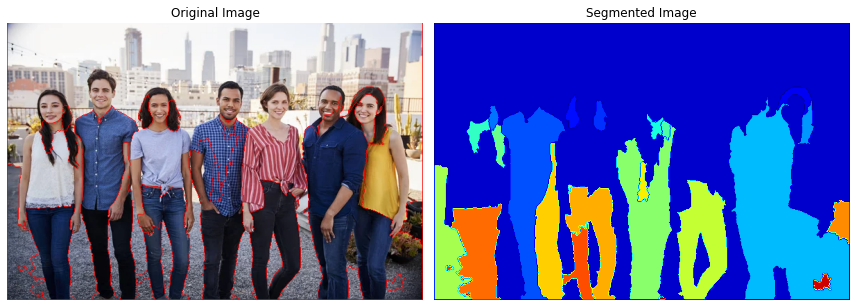

In [10]:
# Example usage
image_path = 'people.jpg'
watershed_segmentation(image_path)

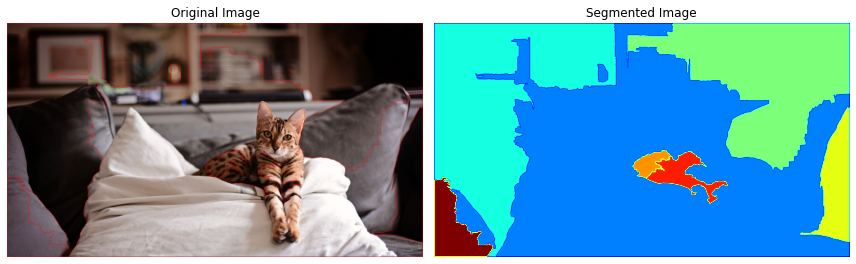

In [11]:
# Example usage
image_path = 'cat.jpg'
watershed_segmentation(image_path)